##**Pythonで視覚化[Dataprep編]**
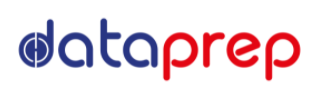\
DataPrep.EDAは、Pythonで最も速く、最も簡単なEDA（Exploratory Data Analysis）ツールです。数行のコードで美しいプロファイルレポートを作成することができます。
***

###**手順**
- 「1．インストール」の「▷」をクリックしてください。（インストールが実行されます）。
- Select_Datasetのドロップダウンメニュー(dataset:)よりデータセット
を選択してください。（任意のcsvデータを読込む場合は Upload を選択してください）
- Load dataset の「▷」をクリックしてください。（データセットが読み込まれます）。
- DataPrep html Report  の「▷」をクリックしてください。（プロファイルレポートが生成され、HTMLファイルの保存が促されます。）
- 2値カテゴリー項目でデータ区分 は、[Category_column_name:] を入力してから、「▷」をクリックしてください。（**[Category_column_name:] が指定できるのは、2値カテゴリーデータのみです。**）

***
## **csvデータ読み込み時の注意点**
- **csvデータの表形式は以下としてください。**

|説明変数1|説明変数2|説明変数3|…|説明変数n|…|目的変数|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|data |data|data |…|data |…|data |
|data |data|data |…|data |…|data |
|･ |･|･ |…|･ |…|･ |
|･ |･|･ |…|･ |…|･ |
|･ |･|･ |…|･ |…|･ |

- [**注意**] csvデータは文字コードを「UTF-8」としてください。



## **1．インストール**

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 4.3 MB/s 
     |████████████████████████████████| 1.0 MB 42.1 MB/s 
     |████████████████████████████████| 101 kB 8.7 MB/s 
     |████████████████████████████████| 28.5 MB 6.4 MB/s 
     |████████████████████████████████| 965 kB 44.8 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 749 kB 33.7 MB/s 
     |████████████████████████████████| 133 kB 41.4 MB/s 
     |████████████████████████████████| 1.0 MB 44.1 MB/s 
     |████████████████████████████████| 78 kB 2.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 5.8 MB/s 
     |████████████████████████████████| 232 kB 67.6 MB/s 
     |████████████████████████████████| 1.6 MB 63.8 MB/s 
     |███████████████████████

In [ ]:
from dataprep.eda import *

## **2．データセット読込み**

In [ ]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'Loan_prediction :binary' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Titanic(seaborn) :binary', 'Iris :classification', 'Loan_prediction :binary','wine :classification', 'Occupancy_detection :binary', 'Upload']

In [ ]:
#@title Load dataset

#ライブラリインポート
#import numpy as np    #数値計算ライブラリ
import pandas as pd   #データを効率的に扱うライブラリ
import seaborn as sns #視覚化ライブラリ
import warnings       #警告を表示させないライブラリ
warnings.simplefilter('ignore')

'''
dataset（ドロップダウンメニュー）で選択したデータセットを読込み、データフレーム（df）に格納。
目的変数は、データフレームの最終列とし、FEATURES、TARGET、X、yを指定した後、データフレーム
に関する情報と先頭5列を表示。
任意のcsvデータを読込む場合は、datasetで'Upload'を選択。

'''

#任意のcsvデータ読込み及びデータフレーム格納、
if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

#Diabetes データセットの読込み及びデータフレーム格納、
elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  diabetes = load_diabetes()
  df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
  df['target'] = diabetes.target

#Breast_cancer データセットの読込み及びデータフレーム格納、
elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  breast_cancer = load_breast_cancer()
  df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
  #df['target'] = breast_cancer.target  #目的変数をカテゴリー数値とする時
  df['target'] = breast_cancer.target_names[breast_cancer.target]

#Titanic データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  #目的変数 Survived をデータフレーム最終列に移動
  X = df.drop(['Survived'], axis=1)
  y = df['Survived'] 
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#Titanic(seaborn) データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic(seaborn) :binary":
  df = sns.load_dataset('titanic')
  #重複データをカットし、目的変数 alive をデータフレーム最終列に移動
  X = df.drop(['survived','pclass','embarked','who','adult_male','alive'], axis=1)
  y = df['alive']                   #目的変数データ
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#iris データセットの読込み及びデータフレーム格納、
elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  iris = load_iris()
  df = pd.DataFrame(iris.data, columns = iris.feature_names)
  #df['target'] = iris.target  #目的変数をカテゴリー数値とする時
  df['target'] = iris.target_names[iris.target]

#wine データセットの読込み及びデータフレーム格納、
elif dataset == "wine :classification":
  from sklearn.datasets import load_wine
  wine = load_wine()
  df = pd.DataFrame(wine.data, columns = wine.feature_names)
  #df['target'] = wine.target  #目的変数をカテゴリー数値とする時
  df['target'] = wine.target_names[wine.target]

#Loan_prediction データセットの読込み及びデータフレーム格納、 
elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

#Occupancy_detection データセットの読込み及びデータフレーム格納、 
elif dataset =='Occupancy_detection :binary':
  data_url = 'https://raw.githubusercontent.com/hima2b4/Auto_Profiling/main/Occupancy-detection-datatest.csv'
  df = pd.read_csv(data_url)
  df['date'] = pd.to_datetime(df['date'])    #[date]のデータ型をdatetime型に変更

#Boston データセットの読込み及びデータフレーム格納 
else:
  from sklearn.datasets import load_boston
  boston = load_boston()
  df = pd.DataFrame(boston.data, columns = boston.feature_names)
  df['target'] = boston.target

#FEATURES、TARGET、X、yを指定 
FEATURES = df.columns[:-1]    #説明変数のデータ項目を指定
TARGET = df.columns[-1]       #目的変数のデータ項目を指定
X = df.loc[:, FEATURES]       #FEATURESのすべてのデータをXに格納
y = df.loc[:, TARGET]         #TARGETのすべてのデータをyに格納

#データフレーム表示
df.info(verbose=True)         #データフレーム情報表示（verbose=Trueで表示数制限カット）
df.head()                     #データフレーム先頭5行表示

In [ ]:
#@title **データ項目一覧**
#@markdown **※データ項目一覧を表示します。以後のデータ項目の入力は、表示された項目をコピーアンドペーストすると確実です。**
print('データ項目名：',df.columns.values)

## **3．Dataprep実行**

In [ ]:
#@title DataPrep html Report
report = create_report(df)
report.save('DataPrep_Report')

from google.colab import files
files.download( "/content/DataPrep_Report.html" ) 

In [ ]:
#@title 2値カテゴリー項目でデータ区分
Category_column_name =  'xxx'#@param {type:"raw"}

#カテゴリー項目のクラス名をclass1,2に格納
class1 = df[Category_column_name].unique().tolist()[0]
class2 = df[Category_column_name].unique().tolist()[1]

#class1,2データをdf1,2に振り分け
df1 = df[df[Category_column_name] == class1]
df2 = df[df[Category_column_name] == class2]


print('───────────────────────────')
print(' df1:',Category_column_name,'=',class1)
print(' df2:',Category_column_name,'=',class2)
print('───────────────────────────')

plot_diff([df1, df2])

## **参考**

- [**公式のGithub**](https://github.com/sfu-db/dataprep)
- [**Demo in Colab**](https://colab.research.google.com/drive/1U_-pAMcne3hK1HbMB3kuEt-093Np_7Uk?usp=sharing)